In [1]:
from fastai.vision.all import *
import os

In [2]:
imgsPath = Path(os.getcwd()) / 'waving_detection'

In [3]:
def is_waving(filePath):
    return not filePath.name[0].isupper()

In [4]:
wavings = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=145),
    get_y=is_waving,
    item_tfms=Resize(size=224, method='pad', pad_mode=PadMode.Zeros),
    batch_tfms=aug_transforms()
)

In [5]:
dls = wavings.dataloaders(imgsPath)

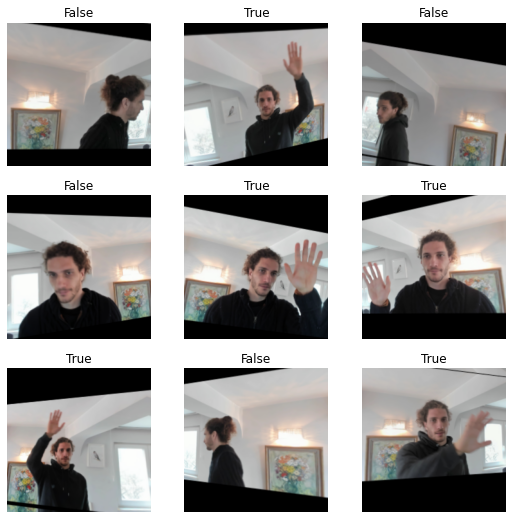

In [6]:
dls.train.show_batch()

In [7]:
learn = vision_learner(dls, resnet18, metrics=error_rate)

In [8]:
learn.fine_tune(15)

epoch,train_loss,valid_loss,error_rate,time
0,0.961153,0.743531,0.465753,00:17


epoch,train_loss,valid_loss,error_rate,time
0,0.731201,0.483720,0.219178,00:21
1,0.556973,0.321324,0.123288,00:21
2,0.485925,0.116910,0.054795,00:20
3,0.410604,0.056821,0.041096,00:21
4,0.350773,0.032040,0.013699,00:21
5,0.312971,0.014317,0.000000,00:21
6,0.268547,0.029842,0.013699,00:21
7,0.245307,0.050728,0.027397,00:20
8,0.216015,0.052665,0.027397,00:20
9,0.192776,0.052099,0.027397,00:21


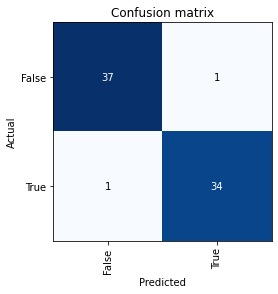

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

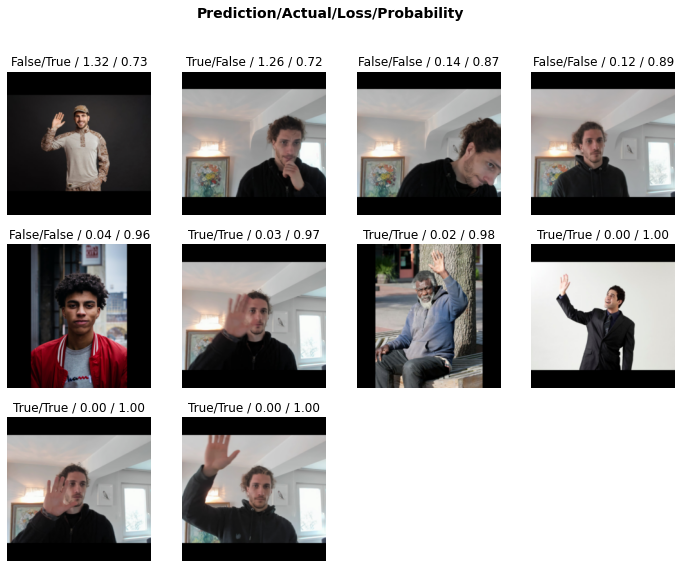

In [10]:
interp.plot_top_losses(10)

In [11]:
learn.export(Path(os.getcwd()) / 'model_v3.pkl')

In [ ]:
from fastai.vision.widgets import *
cleaner = ImageClassifierCleaner(learn)

In [ ]:
cleaner